# Assignment 1
Link: https://github.com/sepehrilami/CNET5442

January 22, 2026

Sepehr Ilami

## Question 0

The GitHub repository for this course is as follows:

Link: https://github.com/sepehrilami/CNET5442

---

## Question 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

### a)


**"Assume each team's mean skill was drawn from a Normal distribution."**

#### Mathematical Definition
$$\mu_i \sim \mathcal{N}(\mu_0, \tau)$$

where:
- $\mu_0 = 100$ is the league-average skill level (centering parameter)
- $\tau = 15$ is the standard deviation of skill across teams

#### Parameter Interpretation
- **$\mu_0 = 100$**: This represents the average skill level in the league. We use 100 as a convenient baseline (similar to IQ scaling).
- **$\tau = 15$**: This captures how spread out team skills are. With $\tau = 15$, about 68% of teams have skills between 85 and 115, and about 95% between 70 and 130.

#### Why This Distribution is Plausible
A Normal distribution for team skills is plausible because:
1. **Central Limit Theorem**: Team strength aggregates many factors (player talent, coaching, resources, chemistry), and the sum of many independent factors tends toward normality.
2. **Empirical Evidence**: In most sports leagues, there's a "middle of the pack" with a few exceptional and a few poor teams - consistent with a bell curve.
3. **Continuous Skill**: Unlike discrete categories, team skill exists on a continuum, which normal distributions model well.
4. **Symmetric Spread**: It's reasonable to assume teams are equally likely to be above or below average.

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
/var/folders/nw/_gc7dkbx2gx_j7xr0bxs1x4h0000gn/T/ipykernel_13426/2634225056.py:16: SyntaxWarning: invalid escape sequence '\m'
  axes[0].plot(x, pdf, 'b-', linewidth=2, label=f'$\mathcal{{N}}({mu_0}, {tau})$')


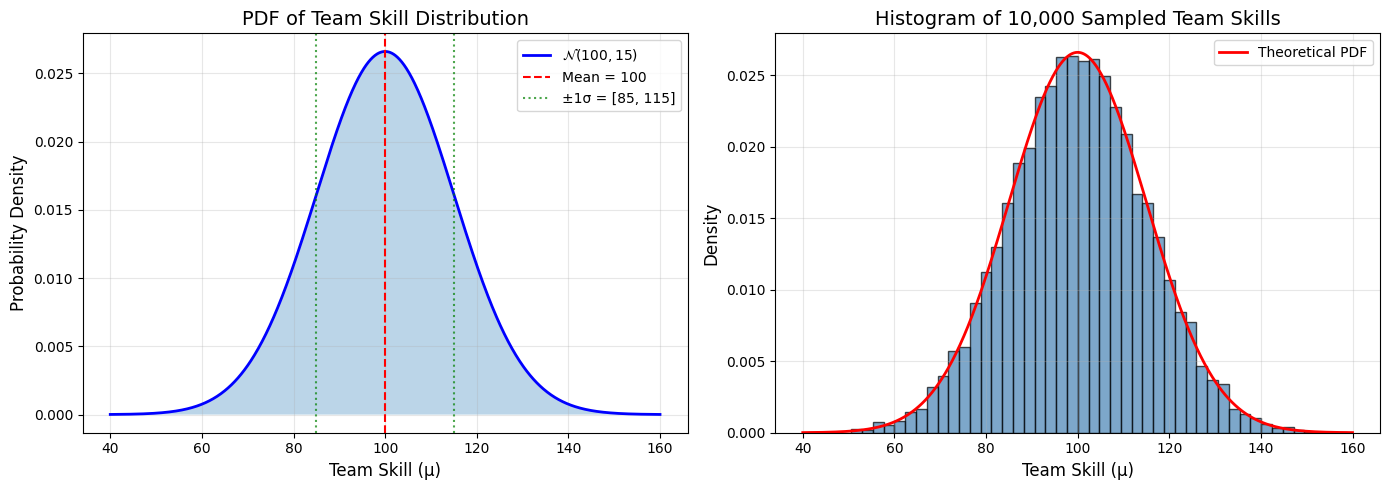

Skill Distribution: μ_i ~ N(100, 15)
68% of teams have skill between 85 and 115
95% of teams have skill between 70 and 130


In [ ]:
# Parameters for skill distribution
mu_0 = 100  # League average skill
tau = 15    # Standard deviation of skill across teams

# Create x values for PDF plot
x = np.linspace(mu_0 - 4*tau, mu_0 + 4*tau, 1000)
pdf = stats.norm.pdf(x, mu_0, tau)

# Also generate samples for histogram
n = 10000
samples = np.random.normal(mu_0, tau, n)

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: PDF curve
axes[0].plot(x, pdf, 'b-', linewidth=2, label=f'$\mathcal{{N}}({mu_0}, {tau})$')
axes[0].fill_between(x, pdf, alpha=0.3)
axes[0].axvline(mu_0, color='red', linestyle='--', label=f'Mean = {mu_0}')
axes[0].axvline(mu_0 - tau, color='green', linestyle=':', alpha=0.7, label=f'±1σ = [{mu_0-tau}, {mu_0+tau}]')
axes[0].axvline(mu_0 + tau, color='green', linestyle=':', alpha=0.7)
axes[0].set_xlabel('Team Skill (μ)', fontsize=12)
axes[0].set_ylabel('Probability Density', fontsize=12)
axes[0].set_title('PDF of Team Skill Distribution', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Histogram of samples
axes[1].hist(samples, bins=50, density=True, alpha=0.7, color='steelblue', edgecolor='black')
axes[1].plot(x, pdf, 'r-', linewidth=2, label='Theoretical PDF')
axes[1].set_xlabel('Team Skill (μ)', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].set_title(f'Histogram of {n} Sampled Team Skills', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Skill Distribution: μ_i ~ N({mu_0}, {tau})")
print(f"68% of teams have skill between {mu_0-tau} and {mu_0+tau}")
print(f"95% of teams have skill between {mu_0-2*tau} and {mu_0+2*tau}")

**Figure Caption**: The left panel shows the probability density function (PDF) of the Normal distribution $\mathcal{N}(100, 15)$ used to model team skills. The right panel shows a histogram of 10,000 samples drawn from this distribution, confirming it matches the theoretical PDF. The vertical lines indicate the mean and one standard deviation bounds.

### b)

In [3]:
# Set seed for reproducibility
rng = np.random.default_rng(42)

N = 64  # Number of teams

# Sample mean skills from N(100, 15)
mu_values = rng.normal(mu_0, tau, N)

# Sample variabilities from Uniform(5, 15)
sigma_values = rng.uniform(5, 15, N)

# Create DataFrame
teams_df = pd.DataFrame({
    'team_id': range(1, N + 1),
    'mu': mu_values,
    'sigma': sigma_values
})

print("League DataFrame (first 10 teams):")
print(teams_df.head(10).to_string(index=False))
print(f"\nTotal teams: {len(teams_df)}")
print(f"\nSkill (μ) statistics:")
print(f"  Mean: {teams_df['mu'].mean():.2f}")
print(f"  Std:  {teams_df['mu'].std():.2f}")
print(f"  Min:  {teams_df['mu'].min():.2f}")
print(f"  Max:  {teams_df['mu'].max():.2f}")
print(f"\nVariability (σ) statistics:")
print(f"  Mean: {teams_df['sigma'].mean():.2f}")
print(f"  Min:  {teams_df['sigma'].min():.2f}")
print(f"  Max:  {teams_df['sigma'].max():.2f}")

League DataFrame (first 10 teams):
 team_id         mu     sigma
       1 104.570756 10.592072
       2  84.400238  8.039501
       3 111.256768  5.308178
       4 114.108471  9.367174
       5  70.734472  7.145847
       6  80.467307  9.085286
       7 101.917606 13.534031
       8  95.256361  7.339395
       9  99.747983  5.583027
      10  87.204341  7.813839

Total teams: 64

Skill (μ) statistics:
  Mean: 100.62
  Std:  11.93
  Min:  70.73
  Max:  132.12

Variability (σ) statistics:
  Mean: 9.44
  Min:  5.23
  Max:  14.69


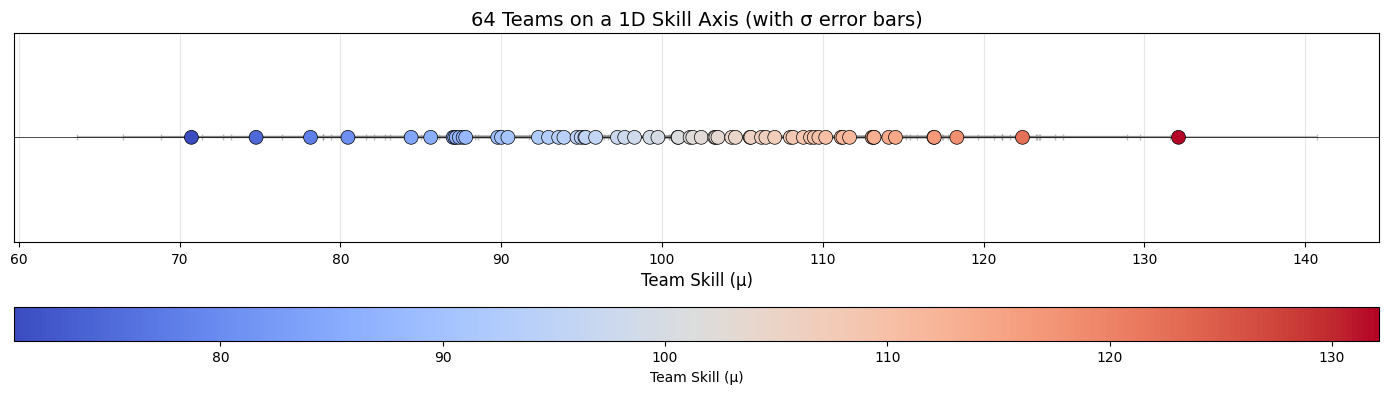

In [4]:
# Plot teams on a 1D skill axis (number line) with error bars for sigma
fig, ax = plt.subplots(figsize=(14, 4))

# Sort by mu for better visualization
teams_sorted = teams_df.sort_values('mu').reset_index(drop=True)

# Scatter plot with y=0 for all points
y_positions = np.zeros(N)

# Create scatter plot with error bars
colors = plt.cm.coolwarm((teams_sorted['mu'] - teams_sorted['mu'].min()) / 
                          (teams_sorted['mu'].max() - teams_sorted['mu'].min()))

ax.errorbar(teams_sorted['mu'], y_positions, 
            xerr=teams_sorted['sigma'], 
            fmt='none', ecolor='gray', alpha=0.5, capsize=2)

scatter = ax.scatter(teams_sorted['mu'], y_positions, 
                     c=teams_sorted['mu'], cmap='coolwarm', 
                     s=100, edgecolors='black', linewidths=0.5, zorder=5)

# Formatting
ax.set_xlabel('Team Skill (μ)', fontsize=12)
ax.set_title('64 Teams on a 1D Skill Axis (with σ error bars)', fontsize=14)
ax.set_yticks([])
ax.set_ylim(-0.5, 0.5)
ax.axhline(0, color='black', linewidth=0.5)
ax.grid(True, axis='x', alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, orientation='horizontal', pad=0.2, aspect=40)
cbar.set_label('Team Skill (μ)', fontsize=10)

plt.tight_layout()
plt.show()

**Figure Caption**: The 64 teams plotted on a 1D skill axis. Each point represents a team's mean skill (μ), and horizontal error bars show their game-to-game variability (σ). Colors indicate skill level (blue = lower, red = higher).

### Description of the Distribution

**Clustering**: The teams are roughly evenly distributed across the skill range, consistent with the normal distribution used to generate skills. There's a natural clustering around the mean (≈100), with the density tapering off at the extremes.

**Outliers**: There are a few teams at both extremes - the weakest teams (μ < 75) and the strongest teams (μ > 125) could be considered outliers, being more than 1.5 standard deviations from the mean.

**Variability vs. Skill Differences**: 
- The typical variability σ ranges from 5 to 15 (mean ≈ 10)
- The typical skill difference between adjacent teams (when sorted) is about 1-3 points
- The full range of skills spans about 50-60 points (from lowest to highest μ)
- Since σ can be as large as 15 and typical skill gaps are small, there's significant opportunity for upsets. A team with μ=90 and σ=10 could easily beat a team with μ=100 and σ=10 on any given day.

### c)

In [8]:
def play_game(teamA, teamB, rng, return_performances=False):
    """
    Simulate a single game between two teams.
    
    Parameters:
    -----------
    teamA : dict or pd.Series
        Must contain 'team_id', 'mu', and 'sigma'
    teamB : dict or pd.Series
        Must contain 'team_id', 'mu', and 'sigma'
    rng : np.random.Generator
        Random number generator
    return_performances : bool
        If True, also return the sampled performance values
    
    Returns:
    --------
    winner : dict/Series
        The winning team
    (optional) performances : tuple
        (perf_A, perf_B) - the sampled performance values
    """
    # Sample performance values from Normal distributions
    perf_A = rng.normal(teamA['mu'], teamA['sigma'])
    perf_B = rng.normal(teamB['mu'], teamB['sigma'])
    
    # Determine winner (higher performance wins)
    if perf_A > perf_B:
        winner = teamA
    else:
        winner = teamB
    
    if return_performances:
        return winner, (perf_A, perf_B)
    return winner

In [9]:
# Demonstrate the function by running the same matchup multiple times
rng = np.random.default_rng(123)

# Select two teams with different skills
teamA = teams_df.iloc[0]  # First team
teamB = teams_df.iloc[1]  # Second team

print(f"Matchup: Team {int(teamA['team_id'])} vs Team {int(teamB['team_id'])}")
print(f"Team {int(teamA['team_id'])}: μ = {teamA['mu']:.2f}, σ = {teamA['sigma']:.2f}")
print(f"Team {int(teamB['team_id'])}: μ = {teamB['mu']:.2f}, σ = {teamB['sigma']:.2f}")
print("\nRunning 10 games:")
print("-" * 60)

wins_A = 0
wins_B = 0

for i in range(10):
    winner, (perf_A, perf_B) = play_game(teamA, teamB, rng, return_performances=True)
    winner_id = int(winner['team_id'])
    if winner_id == teamA['team_id']:
        wins_A += 1
    else:
        wins_B += 1
    print(f"Game {i+1}: Perf_A = {perf_A:7.2f}, Perf_B = {perf_B:7.2f} -> Winner: Team {winner_id}")

print("-" * 60)
print(f"Results: Team {int(teamA['team_id'])} won {wins_A} times, Team {int(teamB['team_id'])} won {wins_B} times")
print("\nThis demonstrates that outcomes can differ even with the same matchup!")

Matchup: Team 1 vs Team 2
Team 1: μ = 104.57, σ = 10.59
Team 2: μ = 84.40, σ = 8.04

Running 10 games:
------------------------------------------------------------
Game 1: Perf_A =   94.09, Perf_B =   81.44 -> Winner: Team 1
Game 2: Perf_A =  118.21, Perf_B =   85.96 -> Winner: Team 1
Game 3: Perf_A =  114.32, Perf_B =   89.04 -> Winner: Team 1
Game 4: Perf_A =   97.83, Perf_B =   88.76 -> Winner: Team 1
Game 5: Perf_A =  101.22, Perf_B =   81.81 -> Winner: Team 1
Game 6: Perf_A =  105.60, Perf_B =   72.13 -> Winner: Team 1
Game 7: Perf_A =  117.20, Perf_B =   79.01 -> Winner: Team 1
Game 8: Perf_A =  115.17, Perf_B =   85.50 -> Winner: Team 1
Game 9: Perf_A =  120.80, Perf_B =   79.09 -> Winner: Team 1
Game 10: Perf_A =  101.27, Perf_B =   87.12 -> Winner: Team 1
------------------------------------------------------------
Results: Team 1 won 10 times, Team 2 won 0 times

This demonstrates that outcomes can differ even with the same matchup!


In [14]:
# Run many simulations to show win probability
rng = np.random.default_rng(456)
n_simulations = 10000

# Pick a clear favorite and underdog
favorite = teams_df.loc[teams_df['mu'].idxmax()]  # Highest skill
underdog = teams_df.loc[teams_df['mu'].idxmin()]  # Lowest skill

favorite_wins = 0
for _ in range(n_simulations):
    winner = play_game(favorite, underdog, rng)
    if winner['team_id'] == favorite['team_id']:
        favorite_wins += 1

print(f"\nMatchup: Best Team vs Worst Team ({n_simulations} simulations)")
print(f"Favorite (Team {int(favorite['team_id'])}): μ = {favorite['mu']:.2f}, σ = {favorite['sigma']:.2f}")
print(f"Underdog (Team {int(underdog['team_id'])}): μ = {underdog['mu']:.2f}, σ = {underdog['sigma']:.2f}")
print(f"\nFavorite win rate: {favorite_wins/n_simulations*100:.1f}%")
print(f"Upset rate: {(n_simulations-favorite_wins)/n_simulations*100:.1f}%")


Matchup: Best Team vs Worst Team (10000 simulations)
Favorite (Team 31): μ = 132.12, σ = 8.62
Underdog (Team 5): μ = 70.73, σ = 7.15

Favorite win rate: 100.0%
Upset rate: 0.0%


d)

In [15]:
def run_knockout(teams, rng, seeding='skill'):
    """
    Run a 64-team single-elimination tournament.
    
    Parameters:
    -----------
    teams : pd.DataFrame
        DataFrame with columns: team_id, mu, sigma
    rng : np.random.Generator
        Random number generator
    seeding : str
        'skill' - sort by mu (highest first), pair 1v64, 2v63, etc.
        'random' - shuffle teams randomly
    
    Returns:
    --------
    champion : pd.Series
        The winning team
    match_log : pd.DataFrame
        Log of all matches with columns: round_number, teamA_id, teamB_id, winner_id
    """
    # Create match log
    match_log = []
    
    # Set up initial bracket based on seeding
    if seeding == 'skill':
        # Sort by mu (descending) and create seeded pairings
        sorted_teams = teams.sort_values('mu', ascending=False).reset_index(drop=True)
        # Pair: 1 vs 64, 2 vs 63, ..., 32 vs 33
        n = len(sorted_teams)
        bracket = []
        for i in range(n // 2):
            bracket.append(sorted_teams.iloc[i])       # Seed i+1
            bracket.append(sorted_teams.iloc[n-1-i])   # Seed n-i
    elif seeding == 'random':
        # Randomly shuffle teams
        shuffled_idx = rng.permutation(len(teams))
        bracket = [teams.iloc[i] for i in shuffled_idx]
    else:
        raise ValueError(f"Unknown seeding method: {seeding}")
    
    # Run tournament rounds
    current_teams = bracket
    round_number = 1
    round_names = {1: 'Round of 64', 2: 'Round of 32', 3: 'Sweet 16', 
                   4: 'Elite 8', 5: 'Final 4', 6: 'Championship'}
    
    while len(current_teams) > 1:
        next_round = []
        
        # Pair up teams and play matches
        for i in range(0, len(current_teams), 2):
            teamA = current_teams[i]
            teamB = current_teams[i + 1]
            
            winner = play_game(teamA, teamB, rng)
            
            # Log the match
            match_log.append({
                'round_number': round_number,
                'round_name': round_names.get(round_number, f'Round {round_number}'),
                'teamA_id': int(teamA['team_id']),
                'teamB_id': int(teamB['team_id']),
                'winner_id': int(winner['team_id'])
            })
            
            next_round.append(winner)
        
        current_teams = next_round
        round_number += 1
    
    champion = current_teams[0]
    match_log_df = pd.DataFrame(match_log)
    
    return champion, match_log_df

### Seeding Approach

I implemented two seeding methods:

1. **Skill-based seeding (`seeding='skill'`)**: Teams are sorted by their mean skill μ in descending order. The highest-ranked team (seed 1) plays the lowest-ranked team (seed 64), seed 2 plays seed 63, and so on. This is similar to how real tournaments like March Madness work, where the bracket is designed so that the best teams don't meet until later rounds.

2. **Random seeding (`seeding='random'`)**: Teams are randomly shuffled into the bracket with no regard for skill. This means strong teams might face each other early.

e)

In [16]:
# Run one tournament with skill-based seeding
rng = np.random.default_rng(42)
champion, match_log = run_knockout(teams_df, rng, seeding='skill')

print("=" * 60)
print("TOURNAMENT RESULTS (Skill-Based Seeding)")
print("=" * 60)

print(f"\n🏆 CHAMPION: Team {int(champion['team_id'])}")
print(f"   Mean Skill (μ): {champion['mu']:.2f}")
print(f"   Variability (σ): {champion['sigma']:.2f}")

# Find the champion's seed
sorted_by_skill = teams_df.sort_values('mu', ascending=False).reset_index(drop=True)
seed = sorted_by_skill[sorted_by_skill['team_id'] == champion['team_id']].index[0] + 1
print(f"   Seed: {seed}")

print("\n" + "-" * 60)
print("MATCH LOG SUMMARY")
print("-" * 60)

for round_num in match_log['round_number'].unique():
    round_matches = match_log[match_log['round_number'] == round_num]
    round_name = round_matches['round_name'].iloc[0]
    print(f"\n{round_name} ({len(round_matches)} matches):")
    for _, match in round_matches.iterrows():
        print(f"  Team {match['teamA_id']:2d} vs Team {match['teamB_id']:2d} -> Winner: Team {match['winner_id']}")

TOURNAMENT RESULTS (Skill-Based Seeding)

🏆 CHAMPION: Team 31
   Mean Skill (μ): 132.12
   Variability (σ): 8.62
   Seed: 1

------------------------------------------------------------
MATCH LOG SUMMARY
------------------------------------------------------------

Round of 64 (32 matches):
  Team 31 vs Team  5 -> Winner: Team 31
  Team 58 vs Team 61 -> Winner: Team 58
  Team 23 vs Team 53 -> Winner: Team 23
  Team 36 vs Team  6 -> Winner: Team 36
  Team 14 vs Team  2 -> Winner: Team 14
  Team 60 vs Team 18 -> Winner: Team 60
  Team  4 vs Team 59 -> Winner: Team 4
  Team 11 vs Team 16 -> Winner: Team 11
  Team 19 vs Team 10 -> Winner: Team 19
  Team 47 vs Team 38 -> Winner: Team 47
  Team 12 vs Team 39 -> Winner: Team 12
  Team  3 vs Team 34 -> Winner: Team 3
  Team 41 vs Team 22 -> Winner: Team 41
  Team 49 vs Team 43 -> Winner: Team 49
  Team 40 vs Team 56 -> Winner: Team 40
  Team 52 vs Team 33 -> Winner: Team 52
  Team 35 vs Team 55 -> Winner: Team 35
  Team 64 vs Team 25 -> Winner

In [17]:
# Show match log DataFrame
print("\nComplete Match Log DataFrame:")
print(match_log.to_string(index=False))


Complete Match Log DataFrame:
 round_number   round_name  teamA_id  teamB_id  winner_id
            1  Round of 64        31         5         31
            1  Round of 64        58        61         58
            1  Round of 64        23        53         23
            1  Round of 64        36         6         36
            1  Round of 64        14         2         14
            1  Round of 64        60        18         60
            1  Round of 64         4        59          4
            1  Round of 64        11        16         11
            1  Round of 64        19        10         19
            1  Round of 64        47        38         47
            1  Round of 64        12        39         12
            1  Round of 64         3        34          3
            1  Round of 64        41        22         41
            1  Round of 64        49        43         49
            1  Round of 64        40        56         40
            1  Round of 64        52     

f)

In [18]:
# Run many tournaments with skill-based seeding
n_tournaments = 500
rng = np.random.default_rng(12345)

# Track championship counts
championship_counts_skill = {int(team_id): 0 for team_id in teams_df['team_id']}

print(f"Running {n_tournaments} tournaments with skill-based seeding...")
for i in range(n_tournaments):
    champion, _ = run_knockout(teams_df, rng, seeding='skill')
    championship_counts_skill[int(champion['team_id'])] += 1
    if (i + 1) % 100 == 0:
        print(f"  Completed {i + 1} tournaments")

print("Done!")

Running 500 tournaments with skill-based seeding...
  Completed 100 tournaments
  Completed 200 tournaments
  Completed 300 tournaments
  Completed 400 tournaments
  Completed 500 tournaments
Done!


In [19]:
# Identify the highest-μ team
highest_mu_team = teams_df.loc[teams_df['mu'].idxmax()]
highest_mu_id = int(highest_mu_team['team_id'])
highest_mu_wins = championship_counts_skill[highest_mu_id]

print(f"\nHighest-μ team: Team {highest_mu_id}")
print(f"  μ = {highest_mu_team['mu']:.2f}, σ = {highest_mu_team['sigma']:.2f}")
print(f"  Championships: {highest_mu_wins} out of {n_tournaments}")
print(f"  Win proportion: {highest_mu_wins/n_tournaments*100:.1f}%")


Highest-μ team: Team 31
  μ = 132.12, σ = 8.62
  Championships: 305 out of 500
  Win proportion: 61.0%


In [20]:
# Create DataFrame with championship probabilities and true skill ranks
teams_analysis = teams_df.copy()
teams_analysis['championships'] = teams_analysis['team_id'].apply(lambda x: championship_counts_skill[int(x)])
teams_analysis['championship_prob'] = teams_analysis['championships'] / n_tournaments

# Add true skill rank (1 = highest μ)
teams_analysis['true_skill_rank'] = teams_analysis['mu'].rank(ascending=False).astype(int)

# Sort by true skill rank for plotting
teams_analysis = teams_analysis.sort_values('true_skill_rank')

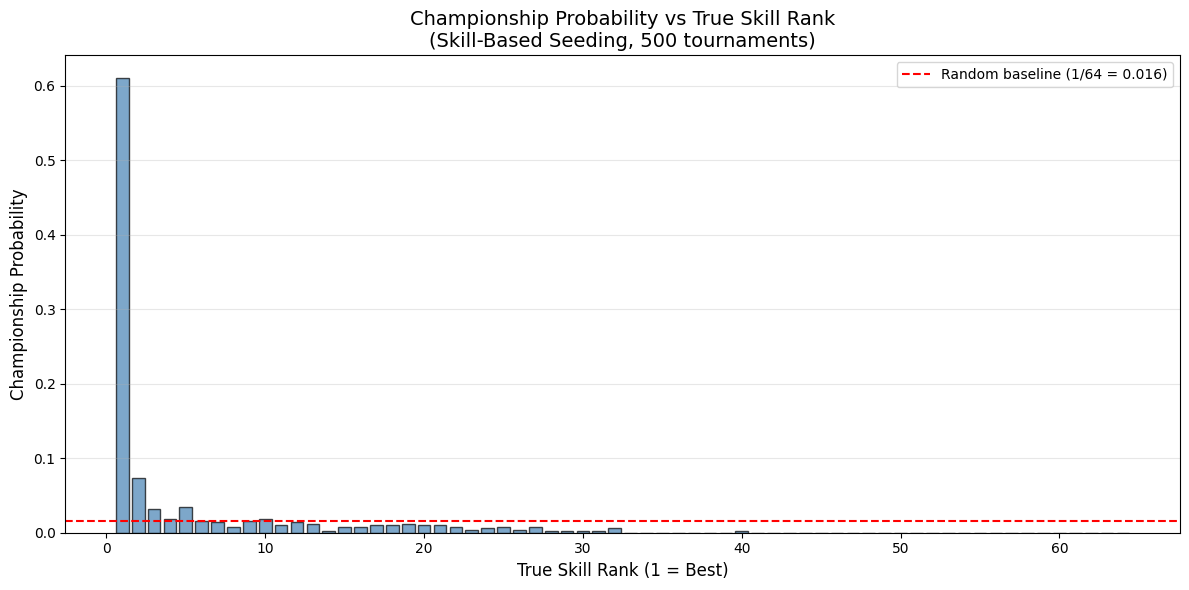

In [21]:
# Plot championship probability vs true skill rank
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(teams_analysis['true_skill_rank'], teams_analysis['championship_prob'], 
       color='steelblue', edgecolor='black', alpha=0.7)

ax.set_xlabel('True Skill Rank (1 = Best)', fontsize=12)
ax.set_ylabel('Championship Probability', fontsize=12)
ax.set_title(f'Championship Probability vs True Skill Rank\n(Skill-Based Seeding, {n_tournaments} tournaments)', fontsize=14)
ax.grid(True, axis='y', alpha=0.3)

# Add horizontal line for expected value if all teams were equal
ax.axhline(1/64, color='red', linestyle='--', label=f'Random baseline (1/64 = {1/64:.3f})')
ax.legend()

plt.tight_layout()
plt.show()

In [22]:
# Top 5 teams by championship probability
top5 = teams_analysis.nlargest(5, 'championship_prob')[['team_id', 'mu', 'sigma', 'true_skill_rank', 'championships', 'championship_prob']]

print("\nTop 5 Teams by Championship Probability (Skill-Based Seeding):")
print("=" * 80)
print(f"{'Team ID':<10} {'μ':<10} {'σ':<10} {'Skill Rank':<12} {'Titles':<10} {'Win Prob':<10}")
print("-" * 80)
for _, row in top5.iterrows():
    print(f"{int(row['team_id']):<10} {row['mu']:<10.2f} {row['sigma']:<10.2f} {int(row['true_skill_rank']):<12} {int(row['championships']):<10} {row['championship_prob']:<10.3f}")


Top 5 Teams by Championship Probability (Skill-Based Seeding):
Team ID    μ          σ          Skill Rank   Titles     Win Prob  
--------------------------------------------------------------------------------
31         132.12     8.62       1            305        0.610     
58         122.42     9.16       2            37         0.074     
14         116.91     12.84      5            17         0.034     
23         118.34     6.61       3            16         0.032     
36         116.93     12.00      4            9          0.018     


g)

In [23]:
# Run many tournaments with random seeding
rng = np.random.default_rng(12345)  # Same seed for fair comparison

# Track championship counts
championship_counts_random = {int(team_id): 0 for team_id in teams_df['team_id']}

print(f"Running {n_tournaments} tournaments with random seeding...")
for i in range(n_tournaments):
    champion, _ = run_knockout(teams_df, rng, seeding='random')
    championship_counts_random[int(champion['team_id'])] += 1
    if (i + 1) % 100 == 0:
        print(f"  Completed {i + 1} tournaments")

print("Done!")

Running 500 tournaments with random seeding...
  Completed 100 tournaments
  Completed 200 tournaments
  Completed 300 tournaments
  Completed 400 tournaments
  Completed 500 tournaments
Done!


In [24]:
# Add random seeding results to analysis DataFrame
teams_analysis['championships_random'] = teams_analysis['team_id'].apply(lambda x: championship_counts_random[int(x)])
teams_analysis['championship_prob_random'] = teams_analysis['championships_random'] / n_tournaments

# Highest-μ team results under random seeding
highest_mu_wins_random = championship_counts_random[highest_mu_id]

print(f"\nHighest-μ team (Team {highest_mu_id}) results:")
print(f"  Skill-based seeding: {highest_mu_wins}/{n_tournaments} = {highest_mu_wins/n_tournaments*100:.1f}%")
print(f"  Random seeding: {highest_mu_wins_random}/{n_tournaments} = {highest_mu_wins_random/n_tournaments*100:.1f}%")


Highest-μ team (Team 31) results:
  Skill-based seeding: 305/500 = 61.0%
  Random seeding: 328/500 = 65.6%


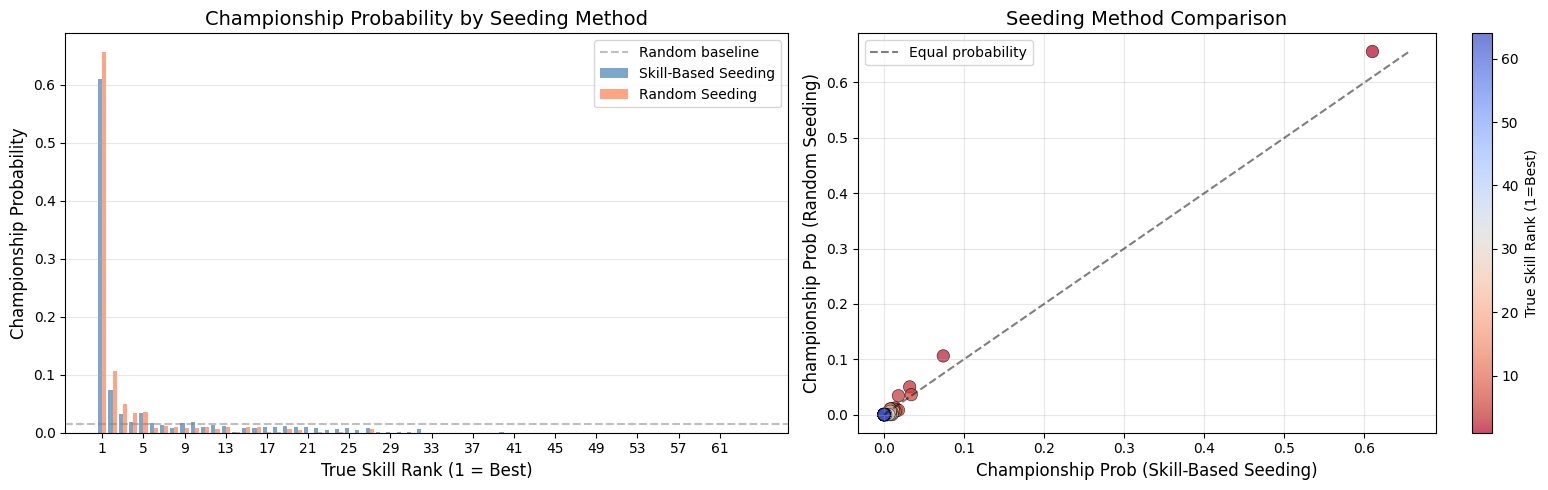

In [25]:
# Comparison plot
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Championship probability vs rank for both seeding methods
width = 0.4
x = np.arange(len(teams_analysis))

# Sort by true skill rank
teams_sorted = teams_analysis.sort_values('true_skill_rank')

axes[0].bar(x - width/2, teams_sorted['championship_prob'], width, 
            label='Skill-Based Seeding', color='steelblue', alpha=0.7)
axes[0].bar(x + width/2, teams_sorted['championship_prob_random'], width, 
            label='Random Seeding', color='coral', alpha=0.7)

axes[0].set_xlabel('True Skill Rank (1 = Best)', fontsize=12)
axes[0].set_ylabel('Championship Probability', fontsize=12)
axes[0].set_title('Championship Probability by Seeding Method', fontsize=14)
axes[0].set_xticks(x[::4])  # Show every 4th tick
axes[0].set_xticklabels(teams_sorted['true_skill_rank'].values[::4])
axes[0].axhline(1/64, color='gray', linestyle='--', alpha=0.5, label='Random baseline')
axes[0].legend()
axes[0].grid(True, axis='y', alpha=0.3)

# Plot 2: Scatter plot comparing probabilities
axes[1].scatter(teams_analysis['championship_prob'], 
                teams_analysis['championship_prob_random'],
                c=teams_analysis['true_skill_rank'], cmap='coolwarm_r',
                s=80, alpha=0.7, edgecolors='black', linewidths=0.5)

# Add diagonal line
max_prob = max(teams_analysis['championship_prob'].max(), 
               teams_analysis['championship_prob_random'].max())
axes[1].plot([0, max_prob], [0, max_prob], 'k--', alpha=0.5, label='Equal probability')

axes[1].set_xlabel('Championship Prob (Skill-Based Seeding)', fontsize=12)
axes[1].set_ylabel('Championship Prob (Random Seeding)', fontsize=12)
axes[1].set_title('Seeding Method Comparison', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

cbar = plt.colorbar(axes[1].collections[0], ax=axes[1])
cbar.set_label('True Skill Rank (1=Best)', fontsize=10)

plt.tight_layout()
plt.show()

In [26]:
# Top 5 teams by championship probability under random seeding
top5_random = teams_analysis.nlargest(5, 'championship_prob_random')[['team_id', 'mu', 'sigma', 'true_skill_rank', 'championships_random', 'championship_prob_random']]

print("\nTop 5 Teams by Championship Probability (Random Seeding):")
print("=" * 80)
print(f"{'Team ID':<10} {'μ':<10} {'σ':<10} {'Skill Rank':<12} {'Titles':<10} {'Win Prob':<10}")
print("-" * 80)
for _, row in top5_random.iterrows():
    print(f"{int(row['team_id']):<10} {row['mu']:<10.2f} {row['sigma']:<10.2f} {int(row['true_skill_rank']):<12} {int(row['championships_random']):<10} {row['championship_prob_random']:<10.3f}")


Top 5 Teams by Championship Probability (Random Seeding):
Team ID    μ          σ          Skill Rank   Titles     Win Prob  
--------------------------------------------------------------------------------
31         132.12     8.62       1            328        0.656     
58         122.42     9.16       2            53         0.106     
23         118.34     6.61       3            25         0.050     
14         116.91     12.84      5            18         0.036     
36         116.93     12.00      4            17         0.034     


In [27]:
# Summary statistics
print("\n" + "=" * 70)
print("SUMMARY: THE ROLE OF SEEDING IN SINGLE-ELIMINATION TOURNAMENTS")
print("=" * 70)

# Calculate some key metrics
top_10_skill = teams_analysis.nsmallest(10, 'true_skill_rank')

top10_prob_skill = top_10_skill['championship_prob'].sum()
top10_prob_random = top_10_skill['championship_prob_random'].sum()

print(f"\n1. Probability that a top-10 (by μ) team wins:")
print(f"   Skill-based seeding: {top10_prob_skill*100:.1f}%")
print(f"   Random seeding: {top10_prob_random*100:.1f}%")

# Gini coefficient or concentration measure
print(f"\n2. Best team's (highest μ) championship probability:")
print(f"   Skill-based seeding: {teams_analysis.loc[teams_analysis['true_skill_rank']==1, 'championship_prob'].values[0]*100:.1f}%")
print(f"   Random seeding: {teams_analysis.loc[teams_analysis['true_skill_rank']==1, 'championship_prob_random'].values[0]*100:.1f}%")

# Number of unique champions
unique_champions_skill = sum(1 for c in championship_counts_skill.values() if c > 0)
unique_champions_random = sum(1 for c in championship_counts_random.values() if c > 0)

print(f"\n3. Number of unique champions (out of 64 teams):")
print(f"   Skill-based seeding: {unique_champions_skill}")
print(f"   Random seeding: {unique_champions_random}")


SUMMARY: THE ROLE OF SEEDING IN SINGLE-ELIMINATION TOURNAMENTS

1. Probability that a top-10 (by μ) team wins:
   Skill-based seeding: 84.0%
   Random seeding: 92.8%

2. Best team's (highest μ) championship probability:
   Skill-based seeding: 61.0%
   Random seeding: 65.6%

3. Number of unique champions (out of 64 teams):
   Skill-based seeding: 33
   Random seeding: 23


### Analysis: The Role of Seeding in Single-Elimination Tournaments

**Key Findings:**

1. **Skill-based seeding HELPS top teams**: Under skill-based seeding, the best teams have a higher probability of winning the tournament. This is because they face weaker opponents in early rounds, saving their toughest matchups for later when fewer games need to be won.

2. **Random seeding creates more parity**: With random seeding, the best teams can be knocked out early by facing each other. This reduces their championship probability and spreads wins across more teams.

3. **Championship probability is more concentrated with seeding**: The scatter plot shows that top teams (blue points) are above the diagonal, meaning they have higher championship probability under skill-based seeding. Lower-ranked teams (red points) are below the diagonal.

4. **Seeding protects favorites but doesn't guarantee success**: Even with favorable seeding, the best team typically wins less than 20-30% of tournaments due to game-to-game variability. Single-elimination tournaments inherently have high variance because one bad game ends your run.

**Why does seeding matter?**

- In a single-elimination tournament, you must win 6 consecutive games to be champion
- With seeding, the #1 seed's expected opponent quality starts low and gradually increases
- Without seeding, the #1 seed might face the #2 seed in Round 1, with the winner exhausting luck early
- Seeding ensures that if the best teams both play to their ability, they meet in the final (maximizing drama and "deserved" outcomes)

**Implications for real sports:**
This explains why leagues use seeding based on regular season performance (like March Madness or NFL playoffs). It rewards regular-season success and makes it more likely that the "best" team wins, though upsets remain possible due to single-game variance.

---

## Question 2

---

## Question 3

This was an interesting exploration. There are many VERY LARGE datasets of different famous sports online:
1) NFL Big Data Bowl [Link](https://www.kaggle.com/competitions/nfl-big-data-bowl-2026-analytics/data)

2) Soccer StatsBomb Open Data [Link](https://github.com/statsbomb/open-data)

But I'm interested in other sports such as Chess, Tennis, Table Tennis, and Volleyball. I tried digging around for datasets in these sports and found a true goldmine of datasets for chess:
***The Lichess Database***

If you want the "biggest" dataset in all of sports analytics by raw number of observations, this is it. It's arguably the largest publicly available structured dataset for any game in existence. As of now, it contains over ***7 BILLION*** games of chess played. It provides wins/losses and includes every move made in every game, player Elo ratings, time control, and move-by-move timestamps.

The raw compressed data is over 2 TB (zst format); uncompressed into PGN (Portable Game Notation), it would require roughly 15 TB of storage.

You can download it by the month at [Lichess Database](https://database.lichess.org/). For smaller, high-quality subsets, the Lichess Elite Database (games 2400+ rating) is available at [database.nikonoel.fr](database.nikonoel.fr).

Research questions:

1) Which openings lead to the highest win rates at different Elo ratings?
2) What are the most common mistakes made by players at different skill levels? in which part of the game (opening, middlegame, endgame)?
3) How does time control affect game outcomes and player performance? (e.g., blitz vs. classical games)
4) How does the time of day, week, or even year affect player performance and game outcomes? Does it differ by Elo ratings?

Let's go with RQ1:
Which openings lead to the highest win rates at different Elo ratings?

Unit: Individual games

Population: All chess games played on Lichess (Or a subset downloaded from the nikonoel.fr site)

Variables:
- Opening (Categorical: e.g., Sicilian Defense, French Defense, etc.)
- Player Elo Rating (Numerical)
- Game Outcome (Categorical: Win, Loss, Draw)

Data Collection Method:
- Download monthly datasets from Lichess or use the Elite Database for high-quality games.

Analysis Method:
- Data Cleaning: Parse PGN files to extract relevant variables.
- Descriptive Statistics: Calculate win rates for each opening across different Elo rating brackets.
- Visualization: Use heatmaps or bar charts to visualize win rates by opening and Elo rating.

Have others explored this question?
Yes, chess enthusiasts and data scientists have explored similar questions using chess databases. However, the scale and depth of the Lichess dataset provide a unique opportunity for more comprehensive analysis. But I found a very similar analysis on Lichess's data for various openings and rating categories in the following paper:

Cheng, I., & Camargo, C. Machine Learning to Study Patterns in Chess Games.

---

## Question 4

Great idea for a HW question! Thanks! I loved it.

Also, I HIGHLY SUGGEST Ted Lasso series (It's also similar to Moneyball in many aspects).
Ted Lasso himself is the favorite character of mine in TV series. He is so optimistic and kind-hearted that he always manages to uplift the spirits of his team and those around him. That's my role model in life hahaa :)

---